In [568]:
import pandas as pd
import MySQLdb
import numpy as np
import matplotlib.pyplot as plt

In [578]:
db = MySQLdb.connect(
                    host='localhost',
                    read_default_file='~/.my.cnf',
                    db='TwitterDB',
                    use_unicode=True
                    )

In [579]:
query = "Select * From following_table;"
following_table = pd.read_sql(query, con=db)

In [581]:
following_table

,user_id,following_user_id,following_user_name,following_user_screen_name
0,1001085057463996418,1060487274,Rep. Doug Collins,RepDougCollins
1,1001085057463996418,1067184143774162944,Mike Detmer - Michigan Patriot,DetmerMike
2,1001085057463996418,1080894931311431682,Rep. Dan Crenshaw,RepDanCrenshaw
3,1001085057463996418,1108472017144201216,Trump War Room - Text TRUMP to 88022,TrumpWarRoom
4,1001085057463996418,112280016,"Nick Searcy,INTERNATIONAL FILM & TELEVISION STAR",yesnicksearcy
...,...,...,...,...
230824,99713078,96675300,Maya Wiley,mayawiley
230825,99713078,96829836,Nasir Jones,Nas
230826,99713078,970207298,Elizabeth Warren,SenWarren
230827,99713078,97474887,Jonathan Capehart,CapehartJ


In [582]:
df = following_table.groupby(['following_user_id']).count()['user_id']

In [626]:
verified_users = list(df[df > 100].index)

In [627]:
len(verified_users)

215

In [628]:
idx = [following_table['following_user_id'][x] in verified_users for x in range(len(following_table))]
following_table_red = following_table[idx]

In [629]:
len(following_table_red['user_id'].unique())

620

In [630]:
fv = {}
users = following_table_red['user_id'].unique()
for u in users:
    following = following_table_red.loc[following_table_red['user_id']==u]['following_user_id'].values
    fv[u] = []
    for f in verified_users:
        if f in following:
            fv[u].append(1)
        else:
            fv[u].append(0) 

In [631]:
following_vectors = pd.DataFrame(columns=verified_users)
i = 0
for u in fv.keys():
    following_vectors.loc[i] = fv[u]
    i += 1
    

In [632]:
following_vectors

,1003107003693137921,1045110787,1060487274,1074480192,1080894931311431682,1108472017144201216,11134252,112047805,11348282,1196441152486072320,...,91882544,9300262,930552552302792705,931286316,939091,942156122,9624742,963480595,970207298,988573326376427520
0,0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,1,...,1,0,1,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0,0,1,1,1,1,1,1,0,1,...,1,0,1,1,0,0,1,1,0,1
616,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
617,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
618,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0


In [633]:
from sklearn.decomposition import PCA

In [634]:
pca = PCA(n_components=0.90,svd_solver= 'full')
pca.fit(following_vectors)

PCA(n_components=0.9, svd_solver='full')

In [635]:
r_following_vectors = pd.DataFrame(pca.transform(following_vectors))

In [636]:
r_following_vectors

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,1.781357,-1.508436,-0.465858,0.685496,-0.382066,0.341431,0.292274,-0.143777,-0.663029,0.142009,...,0.003090,-0.105564,-0.079477,-0.518064,0.064102,0.104567,-0.135301,0.541446,-0.287037,-0.400692
1,-1.939652,-0.380473,0.172325,1.422377,0.537158,-0.128231,-0.350595,0.408762,-0.173188,-0.291088,...,-0.426904,0.471931,-0.127628,0.144235,0.170653,-0.348398,0.299739,-0.561278,-0.159031,0.364540
2,6.285149,1.775733,-0.047449,-0.226563,1.089430,0.132765,-0.282130,-0.838824,0.522023,-0.205126,...,-0.247795,-0.238575,0.189534,0.039538,-0.412455,0.052526,0.559423,0.025386,0.081385,0.039669
3,2.754512,-0.563776,-1.234745,-1.325489,1.976859,0.932966,0.231158,-0.900826,-0.027502,0.882824,...,0.157488,0.067957,-0.118317,-0.147073,-0.152537,-0.094633,-0.277703,0.224109,0.303442,0.086877
4,-0.611957,-2.831149,-0.280754,-0.089438,0.014867,0.055056,-0.197178,0.281098,-0.262267,-0.246475,...,0.109943,-0.033820,-0.038695,0.285971,-0.100140,0.324501,0.264413,-0.058885,0.188777,-0.241417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,6.073458,1.804917,0.825290,0.451341,-1.176393,0.384532,-0.015034,-0.087088,-0.023476,1.054955,...,0.267319,0.260112,0.004604,0.333449,0.256854,0.171541,-0.450154,-0.078594,-0.234029,0.299659
616,0.076634,-2.504394,-0.566591,-0.070321,-0.132488,0.242921,0.294513,-0.226523,-0.331358,0.267724,...,-0.083725,0.121404,-0.077078,0.247566,0.390221,0.206661,0.180162,-0.192142,0.145853,-0.099002
617,0.519737,-2.301024,-0.551093,-0.002649,0.340216,0.776493,0.603811,-0.507194,0.276842,0.766703,...,0.436845,0.165502,0.017941,-0.186531,0.079236,-0.154061,-0.480227,-0.227450,0.200909,-0.416957
618,1.663833,-1.532117,-0.299660,0.015932,1.640224,0.770505,-1.655524,0.226772,-0.308232,-0.892644,...,0.062994,0.032505,0.388352,-0.192150,0.127582,-0.657540,0.389412,-0.397277,-0.013648,-0.198313


In [637]:
from sklearn.cluster import KMeans

In [638]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(r_following_vectors)

In [639]:
r_following_vectors['label'] = kmeans.labels_

In [640]:
user_label = {}
for i in range(len(users)):
    user_label[users[i]] = kmeans.labels_[i]

In [641]:
lab = []
for u in following_table_red['user_id']:
    lab.append(user_label[u])

In [642]:
following_table_red['label'] = lab

<ipython-input-642-a6d0aac9391c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [643]:
following_table_red.groupby('following_user_name')

<AxesSubplot:ylabel='following_user_name'>

/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 128255 missing from current font.

/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127987 missing from current font.

/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127752 missing from current font.

/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127482 missing from current font.

/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127480 missing from current font.

/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 129413 missing from current font.

/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127970 missing from current font.

/usr/local/lib/python3.8/site-packages/ma

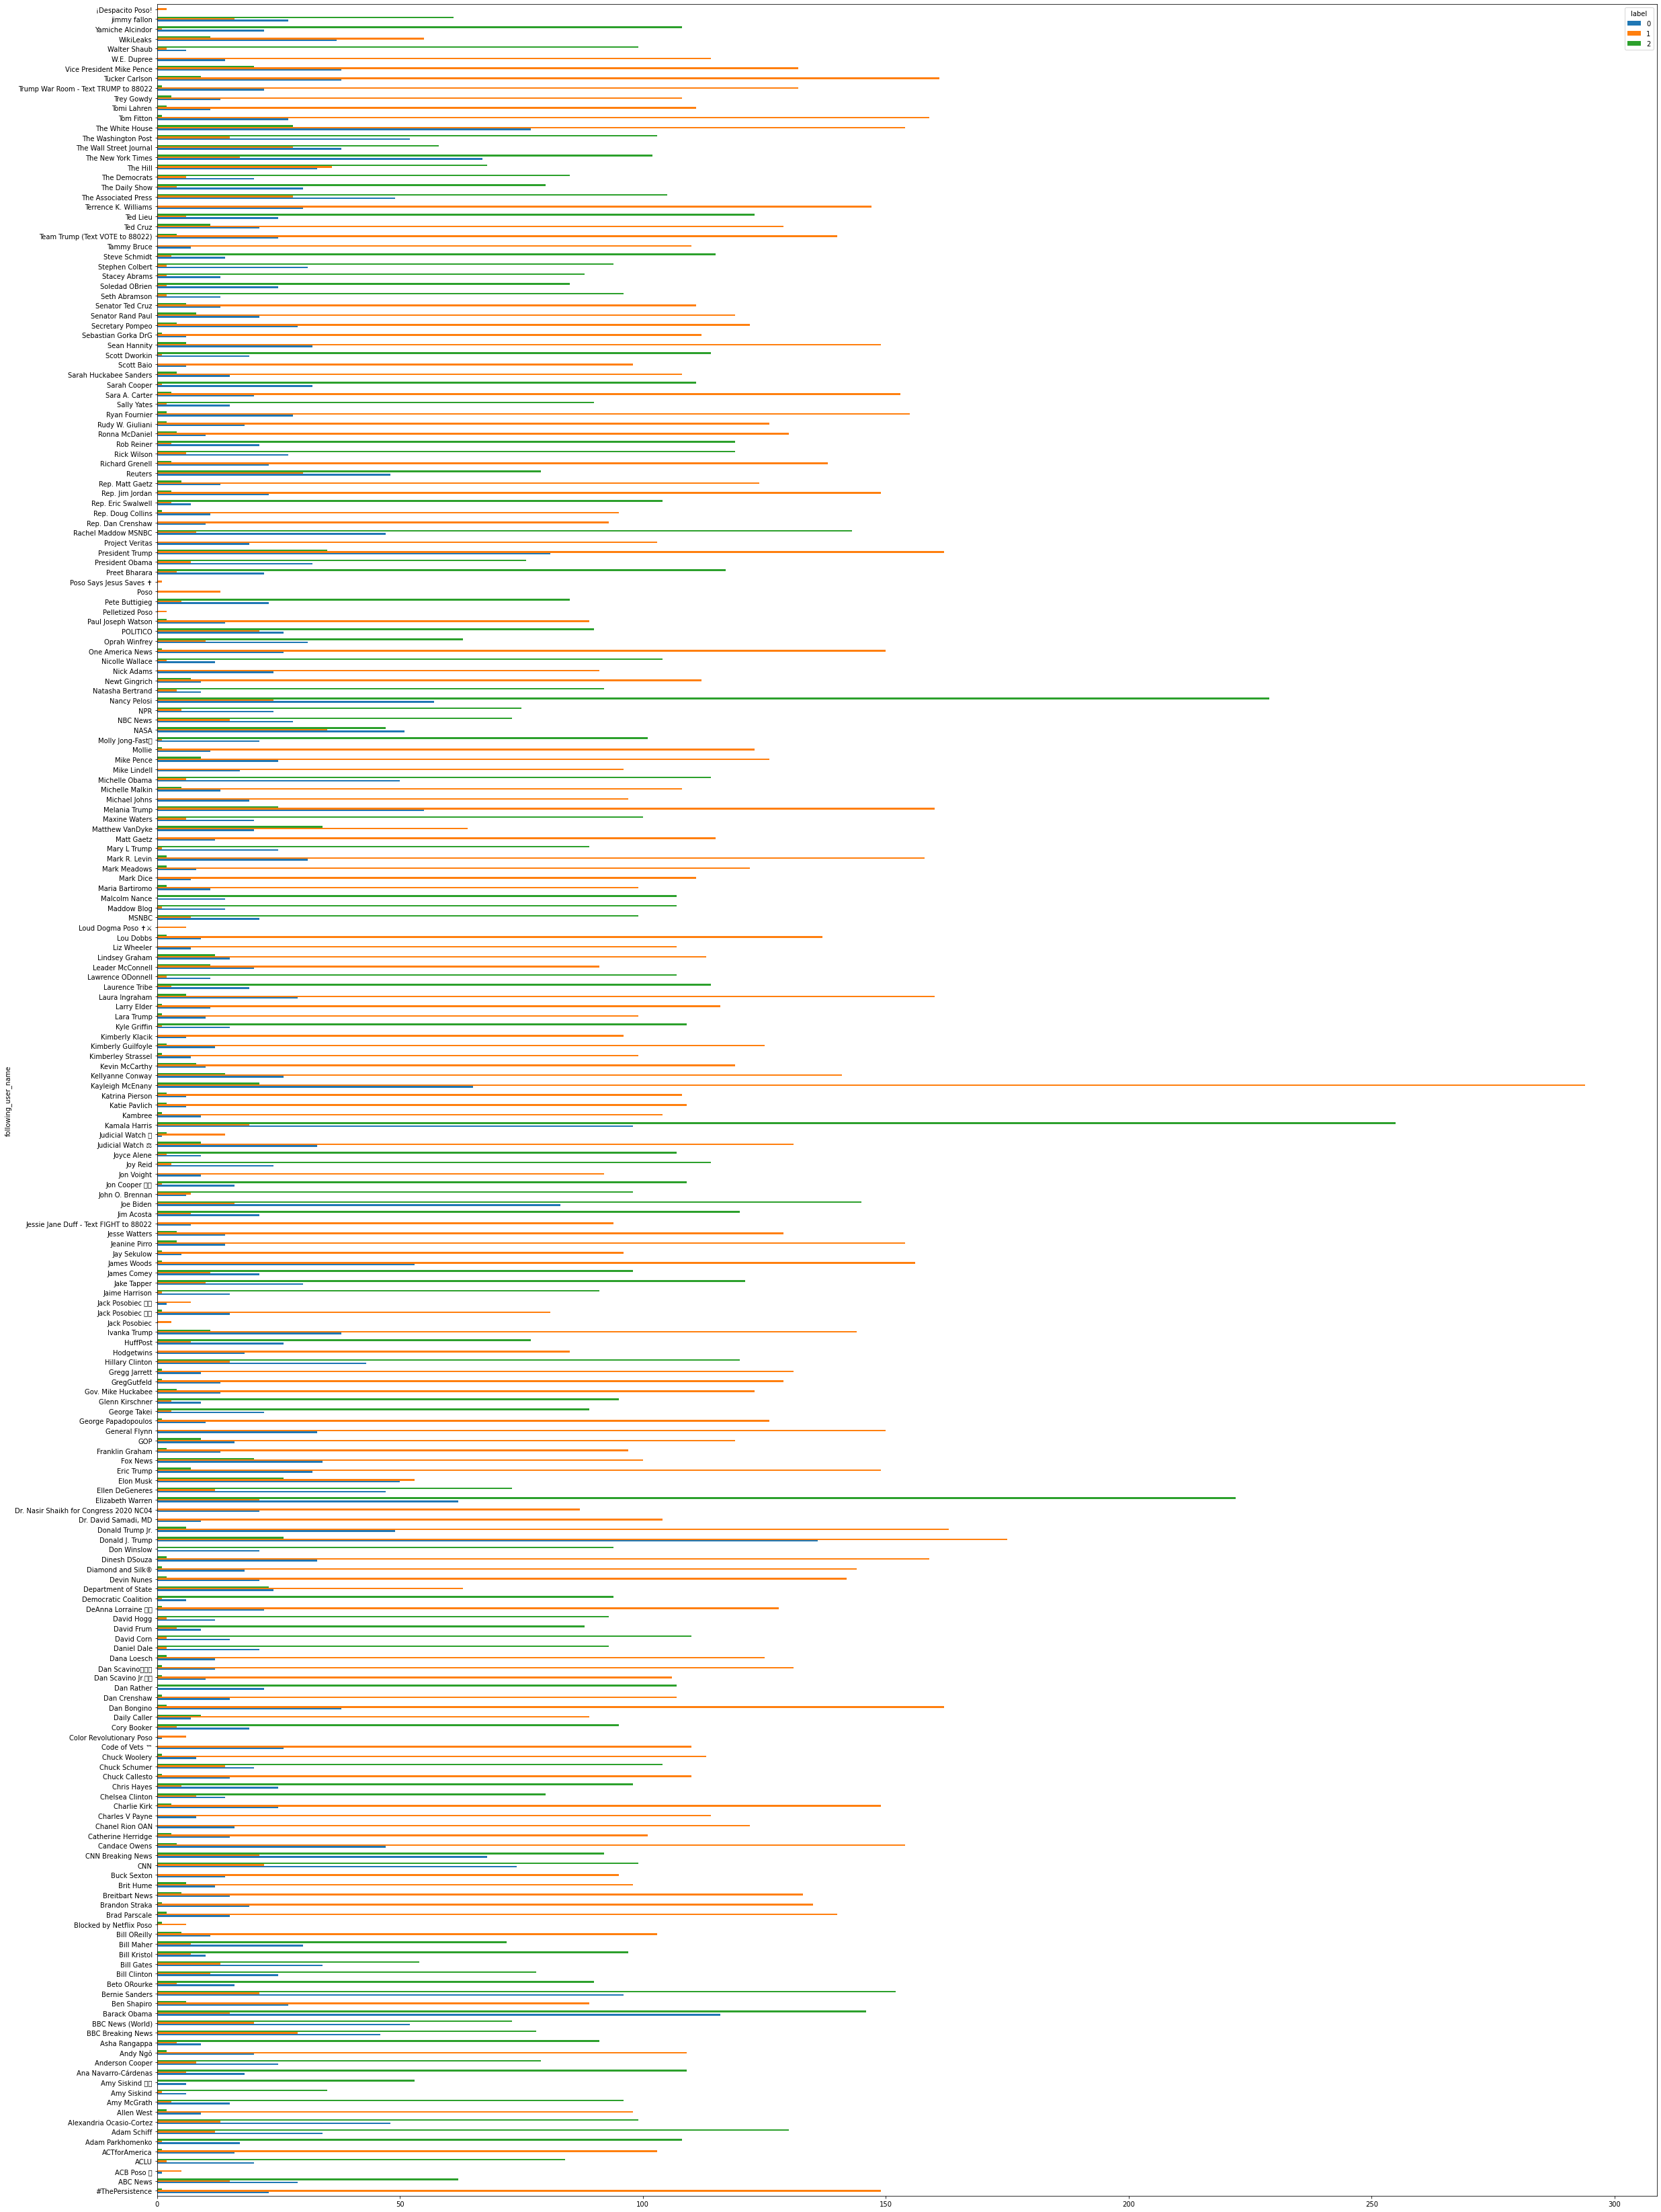

In [644]:
pd.crosstab(following_table_red['following_user_name'],following_table_red['label']).plot(kind='barh',figsize=(40,60))

In [645]:
from sklearn.manifold import TSNE
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [646]:
perplexity = 50
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

In [647]:
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(r_following_vectors.drop('label',axis=1)))
TCs_2d.columns = ["TC1_2d","TC2_2d"]

In [648]:
TCs_2d

,TC1_2d,TC2_2d
0,-6.498305,1.230025
1,2.441866,-2.434561
2,-18.729980,2.622000
3,-8.938977,4.750891
4,-1.731544,1.554178
...,...,...
615,-16.055809,1.568497
616,-3.054895,0.192143
617,-2.996075,1.163442
618,-3.419078,-1.894981


In [649]:
r_following_vectors = pd.concat([r_following_vectors,TCs_2d], axis=1, join='inner')

In [650]:
r_following_vectors

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,label,TC1_2d,TC2_2d
0,1.781357,-1.508436,-0.465858,0.685496,-0.382066,0.341431,0.292274,-0.143777,-0.663029,0.142009,...,-0.518064,0.064102,0.104567,-0.135301,0.541446,-0.287037,-0.400692,0,-6.498305,1.230025
1,-1.939652,-0.380473,0.172325,1.422377,0.537158,-0.128231,-0.350595,0.408762,-0.173188,-0.291088,...,0.144235,0.170653,-0.348398,0.299739,-0.561278,-0.159031,0.364540,0,2.441866,-2.434561
2,6.285149,1.775733,-0.047449,-0.226563,1.089430,0.132765,-0.282130,-0.838824,0.522023,-0.205126,...,0.039538,-0.412455,0.052526,0.559423,0.025386,0.081385,0.039669,1,-18.729980,2.622000
3,2.754512,-0.563776,-1.234745,-1.325489,1.976859,0.932966,0.231158,-0.900826,-0.027502,0.882824,...,-0.147073,-0.152537,-0.094633,-0.277703,0.224109,0.303442,0.086877,1,-8.938977,4.750891
4,-0.611957,-2.831149,-0.280754,-0.089438,0.014867,0.055056,-0.197178,0.281098,-0.262267,-0.246475,...,0.285971,-0.100140,0.324501,0.264413,-0.058885,0.188777,-0.241417,0,-1.731544,1.554178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,6.073458,1.804917,0.825290,0.451341,-1.176393,0.384532,-0.015034,-0.087088,-0.023476,1.054955,...,0.333449,0.256854,0.171541,-0.450154,-0.078594,-0.234029,0.299659,1,-16.055809,1.568497
616,0.076634,-2.504394,-0.566591,-0.070321,-0.132488,0.242921,0.294513,-0.226523,-0.331358,0.267724,...,0.247566,0.390221,0.206661,0.180162,-0.192142,0.145853,-0.099002,0,-3.054895,0.192143
617,0.519737,-2.301024,-0.551093,-0.002649,0.340216,0.776493,0.603811,-0.507194,0.276842,0.766703,...,-0.186531,0.079236,-0.154061,-0.480227,-0.227450,0.200909,-0.416957,0,-2.996075,1.163442
618,1.663833,-1.532117,-0.299660,0.015932,1.640224,0.770505,-1.655524,0.226772,-0.308232,-0.892644,...,-0.192150,0.127582,-0.657540,0.389412,-0.397277,-0.013648,-0.198313,0,-3.419078,-1.894981


In [651]:
r_following_vectors.groupby('label').count()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,TC1_2d,TC2_2d
label,,,,,,,,,,,,,,,,,,,,,
0,290,290,290,290,290,290,290,290,290,290,...,290,290,290,290,290,290,290,290,290,290
1,176,176,176,176,176,176,176,176,176,176,...,176,176,176,176,176,176,176,176,176,176
2,154,154,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154


In [652]:
cluster0 = r_following_vectors[r_following_vectors["label"] == 0]
cluster1 = r_following_vectors[r_following_vectors["label"] == 1]
cluster2 = r_following_vectors[r_following_vectors["label"] == 2]
cluster3 = r_following_vectors[r_following_vectors["label"] == 3]
cluster4 = r_following_vectors[r_following_vectors["label"] == 4]

In [653]:

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)


#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = cluster3["TC1_2d"],
                    y = cluster3["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(128, 255, 100, 0.8)'),
                    text = None)

trace5 = go.Scatter(
                    x = cluster4["TC1_2d"],
                    y = cluster4["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 0, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [654]:
ct = pd.crosstab(following_table_red['following_user_screen_name'],following_table_red['label'])

In [623]:
ct

label,0,1,2
following_user_screen_name,,,
BarackObama,21,226,30
DonaldJTrumpJr,186,7,25
FLOTUS,177,29,34
JoeBiden,23,216,5
KamalaHarris,18,200,4
POTUS,186,41,51
PressSec,187,22,20
RealCandaceO,174,4,27
RealJamesWoods,173,1,36


In [624]:
following_table_red.groupby('label').count()

,user_id,following_user_id,following_user_name,following_user_screen_name
label,,,,
0,1891,1891,1891,1891
1,835,835,835,835
2,403,403,403,403


In [625]:
query = """
        Select t.user_id, u.user_screen_name, t.polarity, t.subjectivity, h.hashtag
        From tweet_table t
        left join hashtag_table h
        on t.tweet_id = h.tweet_id
        left join user_table u
        on u.user_id = t.user_id;
        """
tweet_table = pd.read_sql(query, con=db)

In [556]:
tweet_table['hashtag'] = tweet_table['hashtag'].str.lower()

In [557]:
samp_users = [x in following_table_red['user_id'].unique() for x in tweet_table['user_id']]

In [558]:
tweet_table = tweet_table[samp_users]

In [559]:
clust = [following_table_red.loc[following_table_red['user_id']==u]['label'].values[0] for u in tweet_table['user_id']]

In [560]:
tweet_table['label'] =clust

In [561]:
tweet_table.loc[tweet_table['hashtag']=='2020elections'].groupby('label').mean()

,polarity,subjectivity
label,,
0,0.012500,0.050000
1,0.023769,0.334470
2,-0.461538,0.830769


In [565]:
tweet_table.loc[tweet_table['label']==1]

,user_id,user_screen_name,polarity,subjectivity,hashtag,label
5,18557588,ronyeap,0.000000,0.000000,2020elections,1
62,345046750,EdRonline,0.000000,0.000000,2020elections,1
78,1057639281399943169,ChineseEb5,0.170455,0.454545,2020elections,1
79,1057639281399943169,ChineseEb5,0.170455,0.454545,biden,1
80,1057639281399943169,ChineseEb5,-0.062500,0.187500,america,1
...,...,...,...,...,...,...
10271,2292743989,HiQTPiii,0.000000,0.000000,joebiden,1
10279,809966921277992960,ANC168,0.000000,0.000000,None,1
10291,104918902,OliverThelen,0.000000,0.000000,climatechange,1
10292,104918902,OliverThelen,0.000000,0.000000,donaldtrump,1
